<a href="https://colab.research.google.com/github/MikelBarajas38/MachineLearning/blob/main/ClassComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative Analysis of Classifier Models**

## Machine Learning
### Mikel Ignacio Barajas Martínez

Ingeniería en Sistemas Inteligentes, 2021, 336483, 202102300012 \
Machine Learning, 281601

### 02/25/24

𝝮


In [ ]:
# base imports
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data preparation
from sklearn.model_selection import train_test_split

# metrics and evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# decision tree
from sklearn import tree

# naive bayes
from sklearn.naive_bayes import GaussianNB

# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay # visualization
from sklearn.preprocessing import LabelEncoder

## **Abstract**

This notebook presents a comparative analysis between three simple classifier models: decision trees, which generate “rules” based on the relationship between
the input data (using metrics such as information entropy); Naïve-Bayes, which uses a
joint probability model where all attributes are assumed to be mutually independent; and
a k-nearest neighbor method where a predefined number of training samples closest in distance to the testing point are chosen to predict its class. Two
datasets are used for training and testing: the Iris dataset (1988) and the Wine dataset (1991),
both taken from the UCI machine learning repository. Two training sessions per model were conducted for each dataset, one using a 50/50 training split and the other using an 80/20 training split.

## **Introduction**

Classifier algorithms are, as the name suggests, ones that categorize inputs into one of a defined set of discrete classes (Cuevas, 2020). Such a broad definition encompasses a high number of processes, from simple heuristic-based classifiers to more advanced machine learning
techniques.

A decision tree represents a function that takes as input a vector of attribute values and
returns a “decision”: a single output value, which is reached through a series of tests (Russell
& Norvig, 2015). These tests, or rules, are automatically generated, “learning” the relationship between attributes and outcomes. By definition, this means that a decision tree is a classifier.

Naïve-Bayes is another comparably simple classifier, where all of the attributes are assumed to be mutually independent, which simplifies the application of Bayes’ theorem by expressing a joint probability model as a product of probabilities (Cuevas, 2020).

Nearest neighbors methods use known observations in the training set closest in input space to a sample $x$ to classify said sample by "closeness". Specifically, the k-nearest teighbor for for a given class $Y$ is defined as follows:

\begin{align}
        Y &= \frac{1}{k} \sum_{x_i \in N_k(x)}yi
\end{align}

where $N_k(x)$ is the neighborhood of x defined by the k-closest points $x_i$ in the training set. Closeness implies a metric, e.g., euclidean distance. Basically, the $k$ observations with $x_i$ closest to $x$ in the input space are chosen, and the final classification is based on the average of their responses (Hastie et al., 2008).


## **Methodology**

In order to evaluate and compare the performance of said classifiers, two datasets will be employed: the Iris dataset and the Wine dataset from the UC Irvine Machine Learning
Repository.

Each of the algorithms will be tested twice for each of the datasets, with the first training
session being done using a 50/50 testing split and the second session with an 80/20 training split. The performance will be measured through the confusion matrix and the accuracy of each run.

In [ ]:
class Classifier:

    def __init__(self, name, accuracy, confusion_matrix, report):

        self.name = name
        self.accuracy = accuracy
        self.confusion_matrix = confusion_matrix
        self.report = report


## **Iris Dataset**

The Iris dataset (1988) refers to different features of iris plants. The data set contains 3 classes of 50 instances each (150 instances total), where each class refers to a type of iris plant.

In [ ]:
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [ ]:
# metadata
iris.metadata

{'uci_id': 53,
 'name': 'Iris',
 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris',
 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv',
 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 150,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1936,
 'last_updated': 'Tue Sep 12 2023',
 'dataset_doi': '10.24432/C56C76',
 'creators': ['R. A. Fisher'],
 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica',
  'authors': 'A. Unwin, K. Kleinman',
  'published_in': 'Significance, 2021',
  'year': 2021,
  'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e',
  '

In [ ]:
# variable information
iris.variables

,name,role,type,demographic,description,units,missing_values
0,sepal length,Feature,Continuous,None,None,cm,no
1,sepal width,Feature,Continuous,None,None,cm,no
2,petal length,Feature,Continuous,None,None,cm,no
3,petal width,Feature,Continuous,None,None,cm,no
4,class,Target,Categorical,None,"class of iris plant: Iris Setosa, Iris Versico...",None,no


In [ ]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
x_train50, x_test50, y_train50, y_test50 = train_test_split(X, y, test_size=0.5)
x_train80, x_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2)

### Decision Tree

**50 / 50 split**

[[28  0  0]
 [ 0 22  5]
 [ 0  2 18]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.92      0.81      0.86        27
 Iris-virginica       0.78      0.90      0.84        20

       accuracy                           0.91        75
      macro avg       0.90      0.90      0.90        75
   weighted avg       0.91      0.91      0.91        75



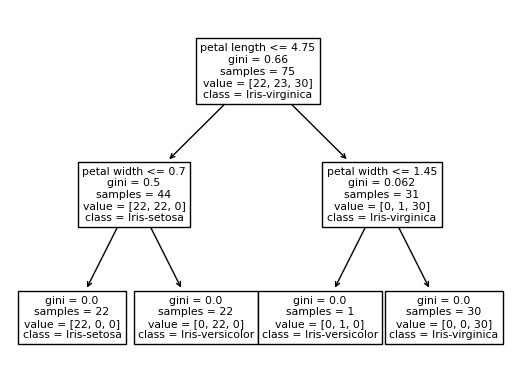

In [ ]:
model = tree.DecisionTreeClassifier()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

tree.plot_tree(model, feature_names = iris.data.headers, class_names = np.unique(y))

iris_tree_5050 = Classifier('Decision Tree 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

**80 / 20 split**

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



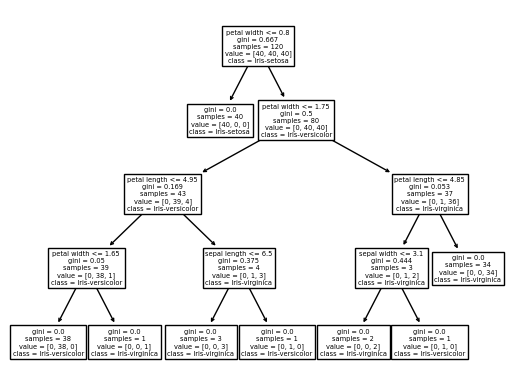

In [ ]:
model = tree.DecisionTreeClassifier()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

tree.plot_tree(model, feature_names = iris.data.headers, class_names = np.unique(y))

iris_tree_8020 = Classifier('Decision Tree 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

### Naive Bayes

**50 / 50 split**

In [ ]:
model = GaussianNB()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

iris_bayes_5050 = Classifier('Naïve-Bayes 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

[[28  0  0]
 [ 0 24  3]
 [ 0  1 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.96      0.89      0.92        27
 Iris-virginica       0.86      0.95      0.90        20

       accuracy                           0.95        75
      macro avg       0.94      0.95      0.94        75
   weighted avg       0.95      0.95      0.95        75



**80 / 20 split**

In [ ]:
model = GaussianNB()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

iris_bayes_8020 = Classifier('Naïve-Bayes 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### K-nearest neighbors

**Visualization**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


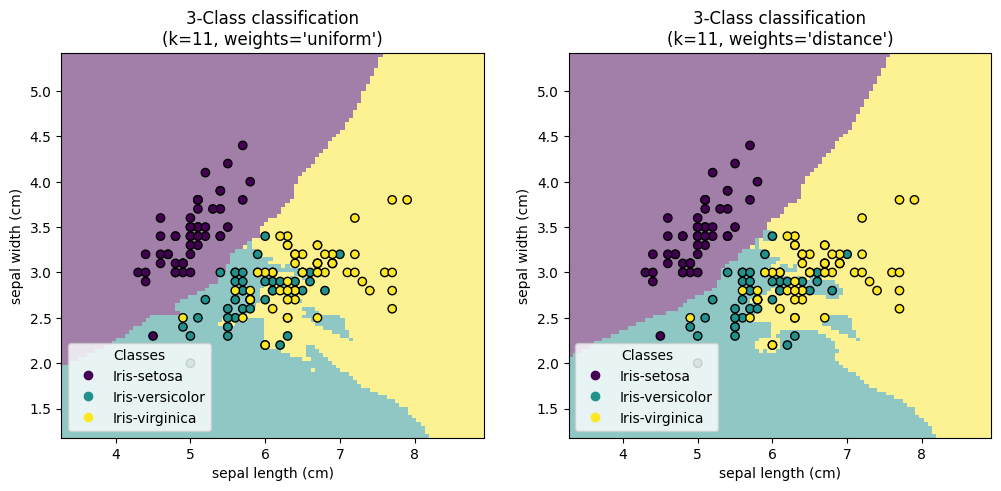

In [ ]:
# taken from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

x_trainvis = x_train50[['sepal length', 'sepal width']]
y_trainvis = y_train50

x_testvis = x_test50[['sepal length', 'sepal width']]
y_testvis = y_test50

label_encoder = LabelEncoder()
colors = label_encoder.fit_transform(y)

iris_knearest_vis = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    iris_knearest_vis.set_params(knn__weights=weights).fit(x_trainvis, y_trainvis.to_numpy().ravel())
    disp = DecisionBoundaryDisplay.from_estimator(
        iris_knearest_vis,
        x_testvis,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="sepal length (cm)",
        ylabel="sepal width (cm)",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        np.unique(y),
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={iris_knearest_vis[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

**50/50 Split**

In [ ]:
model_pred = None
best_accuracy = -1
best_k = 0

for k in range(1, len(x_test50)):

    k_model = Pipeline(
        steps=[("scaler", StandardScaler()), ('knn', KNeighborsClassifier(k, weights = 'distance'))]
    )

    k_model.fit(x_train50, y_train50.to_numpy().ravel())

    k_model_pred = k_model.predict(x_test50)

    k_accuracy = accuracy_score(y_test50, k_model_pred)

    # print(f'> k({k}) accuracy: {k_accuracy}')

    if best_accuracy < k_accuracy:
        best_accuracy = k_accuracy
        model_pred = k_model_pred
        best_k = k

print()
print(f'> best k: {best_k}')
print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

iris_k_neighbors_5050 = Classifier(f'k({best_k})-neighbors 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))


> best k: 17
[[28  0  0]
 [ 0 26  1]
 [ 0  1 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.96      0.96      0.96        27
 Iris-virginica       0.95      0.95      0.95        20

       accuracy                           0.97        75
      macro avg       0.97      0.97      0.97        75
   weighted avg       0.97      0.97      0.97        75



**80/20 Split**

In [ ]:
model_pred = None
best_accuracy = -1
best_k = 0

for k in range(1, len(x_test20)):

    k_model = Pipeline(
        steps=[("scaler", StandardScaler()), ('knn', KNeighborsClassifier(k, weights = 'distance'))]
    )

    k_model.fit(x_train80, y_train80.to_numpy().ravel())

    k_model_pred = k_model.predict(x_test20)

    k_accuracy = accuracy_score(y_test20, k_model_pred)

    # print(f'> k({k}) accuracy: {k_accuracy}')

    if best_accuracy < k_accuracy:
        best_accuracy = k_accuracy
        model_pred = k_model_pred
        best_k = k

print()
print(f'> best k: {best_k}')
print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

iris_k_neighbors_8020 = Classifier(f'k({best_k})-neighbors 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))


> best k: 1
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## **Wine Dataset**

The Wine dataset (1991) contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wine. In total, there are 178 instances, each belonging to one of three different classes of wine.

In [ ]:
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

In [ ]:
# metadata
wine.metadata

{'uci_id': 109,
 'name': 'Wine',
 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine',
 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv',
 'abstract': 'Using chemical analysis to determine the origin of wines',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 178,
 'num_features': 13,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1992,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C5PC7J',
 'creators': ['Stefan Aeberhard', 'M. Forina'],
 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings',
  'authors': 'S. Aeberhard, D. Coomans, O. Vel',
  'published_in': 'Pattern Recognition',
  'year': 1994,
  'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdb

In [ ]:
# variable information
wine.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,Alcohol,Feature,Continuous,None,None,None,no
2,Malicacid,Feature,Continuous,None,None,None,no
3,Ash,Feature,Continuous,None,None,None,no
4,Alcalinity_of_ash,Feature,Continuous,None,None,None,no
5,Magnesium,Feature,Integer,None,None,None,no
6,Total_phenols,Feature,Continuous,None,None,None,no
7,Flavanoids,Feature,Continuous,None,None,None,no
8,Nonflavanoid_phenols,Feature,Continuous,None,None,None,no
9,Proanthocyanins,Feature,Continuous,None,None,None,no


In [ ]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [ ]:
x_train50, x_test50, y_train50, y_test50 = train_test_split(X, y, test_size=0.5)
x_train80, x_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2)

### Decision Tree

**50 / 50 split**

[[25  2  0]
 [ 6 31  2]
 [ 1  1 21]]
              precision    recall  f1-score   support

           1       0.78      0.93      0.85        27
           2       0.91      0.79      0.85        39
           3       0.91      0.91      0.91        23

    accuracy                           0.87        89
   macro avg       0.87      0.88      0.87        89
weighted avg       0.87      0.87      0.87        89



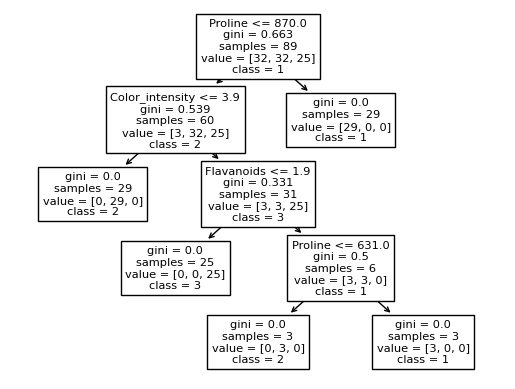

In [ ]:
model = tree.DecisionTreeClassifier()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

tree.plot_tree(model, feature_names = wine.data.headers, class_names = ['1', '2', '3'])

wine_tree_5050 = Classifier('Decision Tree 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

**80 / 20 split**

[[12  0  0]
 [ 2 13  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.81      0.90        16
           3       0.89      1.00      0.94         8

    accuracy                           0.92        36
   macro avg       0.92      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



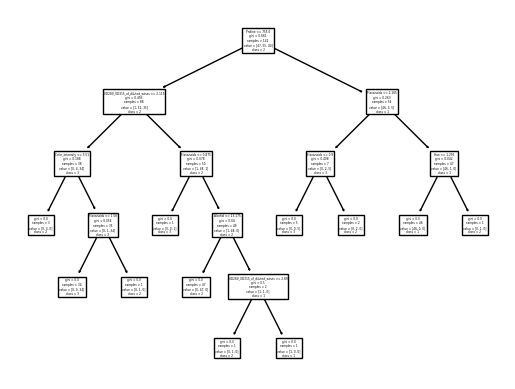

In [ ]:
model = tree.DecisionTreeClassifier()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

tree.plot_tree(model, feature_names = wine.data.headers, class_names = ['1', '2', '3'])

wine_tree_8020 = Classifier('Decision Tree 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

### Naive Bayes

**50 / 50 split**

In [ ]:
model = GaussianNB()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

wine_bayes_5050 = Classifier('Naïve-Bayes 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

[[26  1  0]
 [ 0 37  2]
 [ 0  0 23]]
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        27
           2       0.97      0.95      0.96        39
           3       0.92      1.00      0.96        23

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



**80 / 20 split**

In [ ]:
model = GaussianNB()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

wine_bayes_8020 = Classifier('Naïve-Bayes 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

[[12  0  0]
 [ 0 15  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.94      0.97        16
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



### K-nearest neighbors

**Visualization**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


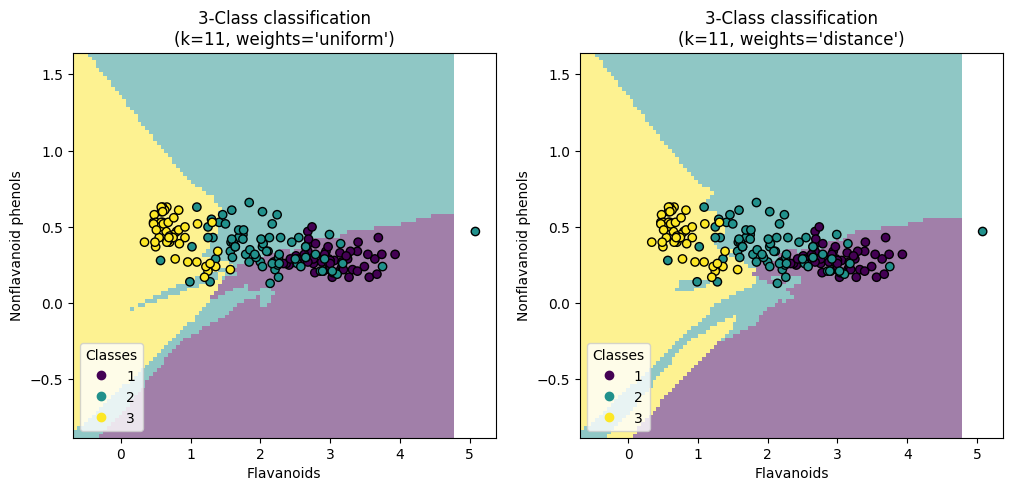

In [ ]:
# taken from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

x_trainvis = x_train50[['Flavanoids', 'Nonflavanoid_phenols']]
y_trainvis = y_train50

x_testvis = x_test50[['Flavanoids', 'Nonflavanoid_phenols']]
y_testvis = y_test50

label_encoder = LabelEncoder()
colors = label_encoder.fit_transform(y)

wine_knearest_vis = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    wine_knearest_vis.set_params(knn__weights=weights).fit(x_trainvis, y_trainvis.to_numpy().ravel())
    disp = DecisionBoundaryDisplay.from_estimator(
        wine_knearest_vis,
        x_testvis,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Flavanoids",
        ylabel="Nonflavanoid phenols",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 6], X.iloc[:, 7], c=colors, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        ['1', '2', '3'],
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={wine_knearest_vis[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

**50/50 Split**

In [ ]:
model_pred = None
best_accuracy = -1
best_k = 0

for k in range(1, len(x_test50)):

    k_model = Pipeline(
        steps=[("scaler", StandardScaler()), ('knn', KNeighborsClassifier(k, weights = 'distance'))]
    )

    k_model.fit(x_train50, y_train50.to_numpy().ravel())

    k_model_pred = k_model.predict(x_test50)

    k_accuracy = accuracy_score(y_test50, k_model_pred)

    # print(f'> k({k}) accuracy: {k_accuracy}')

    if best_accuracy < k_accuracy:
        best_accuracy = k_accuracy
        model_pred = k_model_pred
        best_k = k

print()
print(f'> best k: {best_k}')
print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

wine_k_neighbors_5050 = Classifier(f'k({best_k})-neighbors 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))


> best k: 7
[[26  1  0]
 [ 4 33  2]
 [ 0  0 23]]
              precision    recall  f1-score   support

           1       0.87      0.96      0.91        27
           2       0.97      0.85      0.90        39
           3       0.92      1.00      0.96        23

    accuracy                           0.92        89
   macro avg       0.92      0.94      0.92        89
weighted avg       0.93      0.92      0.92        89



**80/20 Split**

In [ ]:
model_pred = None
best_accuracy = -1
best_k = 0

for k in range(1, len(x_test20)):

    k_model = Pipeline(
        steps=[("scaler", StandardScaler()), ('knn', KNeighborsClassifier(k, weights = 'distance'))]
    )

    k_model.fit(x_train80, y_train80.to_numpy().ravel())

    k_model_pred = k_model.predict(x_test20)

    k_accuracy = accuracy_score(y_test20, k_model_pred)

    # print(f'> k({k}) accuracy: {k_accuracy}')

    if best_accuracy < k_accuracy:
        best_accuracy = k_accuracy
        model_pred = k_model_pred
        best_k = k

print()
print(f'> best k: {best_k}')
print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

wine_k_neighbors_8020 = Classifier(f'k({best_k})-neighbors 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))


> best k: 7
[[12  0  0]
 [ 1 14  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93        16
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



## Results

The following tables contain the evaluation metrics for each of the models.

### Iris Dataset

**50/50 Split**

In [ ]:
models = [iris_tree_5050, iris_bayes_5050, iris_k_neighbors_5050]

data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}

table_iris_5050 = pd.DataFrame(data)

In [ ]:
table_iris_5050

,Model,Accuracy
0,Decision Tree 50/50,0.906667
1,Naïve-Bayes 50/50,0.946667
2,k(17)-neighbors 50/50,0.973333


**80/20 Split**

In [ ]:
models = [iris_tree_8020, iris_bayes_8020, iris_k_neighbors_8020]

data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}

table_iris_8020 = pd.DataFrame(data)

In [ ]:
table_iris_8020

,Model,Accuracy
0,Decision Tree 80/20,0.933333
1,Naïve-Bayes 80/20,1.000000
2,k(1)-neighbors 80/20,0.966667


### Wine Dataset

**50/50 Split**

In [ ]:
models = [wine_tree_5050, wine_bayes_5050, wine_k_neighbors_5050]

data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}

table_wine_5050 = pd.DataFrame(data)

In [ ]:
table_wine_5050

,Model,Accuracy
0,Decision Tree 50/50,0.865169
1,Naïve-Bayes 50/50,0.966292
2,k(7)-neighbors 50/50,0.921348


**80/20 Split**

In [ ]:
models = [wine_tree_8020, wine_bayes_8020, wine_k_neighbors_8020]

data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}

table_wine_8020 = pd.DataFrame(data)

In [ ]:
table_wine_8020

,Model,Accuracy
0,Decision Tree 80/20,0.916667
1,Naïve-Bayes 80/20,0.972222
2,k(7)-neighbors 80/20,0.944444


## **Conclusions**

Most of the classifiers had comparable results, scoring relatively highly in each of the
tests. In order to choose which algorithms one to use in future work, one should conduct tests using multiple approaches with different training and testing sampling techniques, since, as always, the algorithms are just the pawns while data is king.

Additionally, maybe by averaging the results over a set of tests, one could get more representative results since the accuracy with the same split percentages varies between test runs.

## **References**

Aeberhard, S. & Forina, M. (1991). Wine. UCI Machine Learning Repository.
https://doi.org/10.24432/C5PC7J.

Cuevas, J. (2020). Handouts on Classification Algorithms. DOI:10.13140/RG.2.2.23597.03043/1.

Hastie, T., Tibshirani, R., Friedman, R. (2008). The Elements of
Statistical Learning: Data Mining, Inference, and Prediction. Springer.

Fisher, R. A. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

Russell, S. & Norvig, P. (2015). Artificial Intelligence: A Modern Approach, 3rd Edition. Pearson Education. ISBN: 978-0136042594.